In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib
from scipy.interpolate import PchipInterpolator as pchip
from scipy.interpolate import CubicSpline
import sys
sys.path.append('../')
from functions import rot_xy

Figure 11.1: Time scales involved in chemical reactions in solution

In [ ]:
y = np.zeros(100)

# First row
x_collision = np.linspace(2*10**(-15), 7*10**(-13), 100) # Collision time in liquid
x_molecular = np.linspace(2*10**(-12), 10**(-9), 100) # Molecular rotation

# Second row
x_solvent = np.linspace(2.5*10**(-13), 2*10**(-11), 100) # Solvent relaxation

# Third row
x_vibration = np.linspace(6*10**(-14), 2*10**(-12), 100) # Vibrational motion
x_electronic = np.linspace(5*10**(-12), 1.5*10**(-8), 100) # Electronic relaxation

# Fourth row
x_photoion = np.linspace(4*10**(-15), 2*10**(-13), 100) # Photoionization
x_proton = np.linspace(10**(-12), 1.1*10**(-10), 100) # Proton transfer

# Fifth row
x_photodis = np.linspace(1.1*10**(-14), 8*10**(-12), 100) # Photodissociation
x_photochem = np.linspace(2.5*10**(-11), 5.5*10**(-8), 100) # Photochemical isonerization

# Sixth row
x_cage = np.linspace(1.1*10**(-13), 4*10**(-11), 100) # Cage recombination

# Seventh row
x_protein = np.linspace(2*10**(-11), 3.5*10**(-8), 100) # Protein internal motion

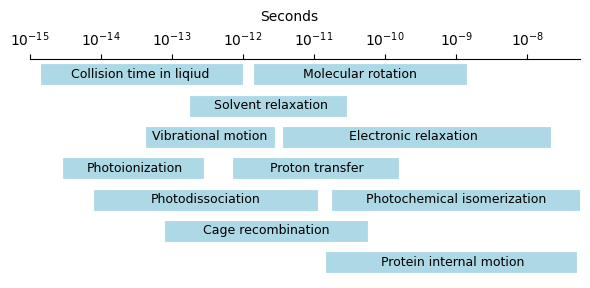

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6, 3))

# First row
# Collision time in liqiud
ax.plot(x_collision, y+7, lw = 15, color = 'lightblue')
ax.text(3.6*10**(-14), 7, 'Collision time in liqiud', ha = 'center', va = 'center', fontsize = 9)
# Molecular rotation
ax.plot(x_molecular, y+7, lw = 15, color = 'lightblue')
ax.text(4.4*10**(-11), 7, 'Molecular rotation', ha = 'center', va = 'center', fontsize = 9)

# Second row
# Solvent relaxation
ax.plot(x_solvent, y+6, lw = 15, color = 'lightblue')
ax.text(2.5*10**(-12), 6, 'Solvent relaxation', ha = 'center', va = 'center', fontsize = 9)

# Third row
# Vibrational motion
ax.plot(x_vibration, y+5, lw = 15, color = 'lightblue')
ax.text(3.4*10**(-13), 5, 'Vibrational motion', ha = 'center', va = 'center', fontsize = 9)
# Electronic relaxation
ax.plot(x_electronic, y+5, lw = 15, color = 'lightblue')
ax.text(2.5*10**(-10), 5, 'Electronic relaxation', ha = 'center', va = 'center', fontsize = 9)

# Fourth row
# Photoionization
ax.plot(x_photoion, y+4, lw = 15, color = 'lightblue')
ax.text(3*10**(-14), 4, 'Photoionization', ha = 'center', va = 'center', fontsize = 9)
# Proton transfer
ax.plot(x_proton, y+4, lw = 15, color = 'lightblue')
ax.text(1.1*10**(-11), 4, 'Proton transfer', ha = 'center', va = 'center', fontsize = 9)

# Fifth row
# Photodissociation
ax.plot(x_photodis, y+3, lw = 15, color = 'lightblue')
ax.text(3*10**(-13), 3, 'Photodissociation', ha = 'center', va = 'center', fontsize = 9)
# Phochemical isomerization
ax.plot(x_photochem, y+3, lw = 15, color = 'lightblue')
ax.text(10**(-9), 3, 'Photochemical isomerization', ha = 'center', va = 'center', fontsize = 9)

# Sixth row
# Cage recombination
ax.plot(x_cage, y+2, lw = 15, color = 'lightblue')
ax.text(2.1*10**(-12), 2, 'Cage recombination', ha = 'center', va = 'center', fontsize = 9)

# Seventh row
# Protein internal motion
ax.plot(x_protein, y+1, lw = 15, color = 'lightblue')
ax.text(9*10**(-10), 1, 'Protein internal motion', ha = 'center', va = 'center', fontsize = 9)

ax.text(4.5*10**(-12), 8.7, 'Seconds', ha = 'center')

# Remove frame and ticks from plot
plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticks([], minor=True)
ax.set_yticks([], minor=True)
sns.despine(right = True, left = True, bottom = True, top = False)

ax.set_xscale('log', subs = [1, 10])
ax.set_xlim(10**(-15), 5.5*10**(-8))
ax.set_ylim(0.5, 7.5)

plt.tight_layout()
plt.savefig('Time.png', dpi = 150)
plt.show()

Figure 11.2: Solvent effects on the transition state at the high friction limit

In [ ]:
RC = np.linspace(-7, 7, 1000)
y = 7*RC+4.2*RC**2-3.7*RC**3+0.5*RC**4

RC_trans = np.linspace(0.15, 3, 1000)
transition = (7*RC_trans+4.2*RC_trans**2-3.7*RC_trans**3+0.5*RC_trans**4
              +0.8*np.cos((RC_trans-1.62)*(20+np.abs(7+2*4.2*RC_trans-3.7*3*RC_trans**2+0.5*4*RC_trans**3)))+1.2)

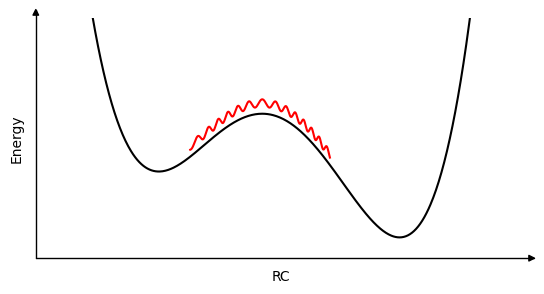

In [5]:
fig = plt.figure(figsize = (5.5,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.plot(RC+3, y+20, color = 'k')
ax.plot(RC_trans+3, transition+21, color = 'r')
ax.set_xlim(0, 10)
ax.set_ylim(0, 50)

ax.set_xlabel('RC')
ax.set_ylabel('Energy')

plt.tight_layout()
plt.savefig('HighFriction.png', dpi = 150)
plt.show()

Figure 11.3: Solvent effects on the transition state at the little friction limit

In [7]:
RC = np.linspace(-7, 7, 1000)

y = 7*RC+4.2*RC**2-3.7*RC**3+0.5*RC**4

x_points = [1.25, 1.5, 2, 2.5, 2.75, 3]
y_values = [2, 3.5, 1.8, 8.5, 1.5, 5][::-1]
y_spline = pchip(x_points, y_values)
x_plot_points = np.linspace(1.25, 3, 100)
x_rot1, y_rot1 = rot_xy(x_plot_points, y_spline(x_plot_points), -np.pi/2)

x_points = [1.25, 1.5, 1.75]
y_values = [4.5, 8, 4.8][::-1]
y_spline = pchip(x_points, y_values)
x_plot_points = np.linspace(1.25, 1.8, 100)
x_rot2, y_rot2 = rot_xy(x_plot_points, y_spline(x_plot_points), -np.pi*0.478)

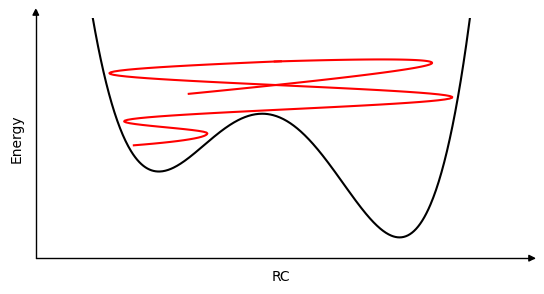

In [8]:
fig = plt.figure(figsize = (5.5,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.plot(RC+3, y+20, color = 'k')
ax.plot(x_rot1, (y_rot1*10)+53.5, color = 'r')
ax.plot(x_rot2, (y_rot2-0.34)*10+53.5, color = 'r')
ax.set_xlim(0, 10)
ax.set_ylim(0, 50)

ax.set_xlabel('RC')
ax.set_ylabel('Energy')

plt.tight_layout()
plt.savefig('LittleFriction.png', dpi = 150)
plt.show()

Figure 11.4: The potential of the mean force as a function of separation distance

In [9]:
x1 = np.linspace(0.7, 2, 1000)
y1 = np.exp(-0.5*x1)*np.sin(3*x1)
x2 = np.linspace(2.2, 7.3, 1000)
y2 = np.exp(-0.5*x2)*np.sin(3*x2)
# y[0:200] += 0.2

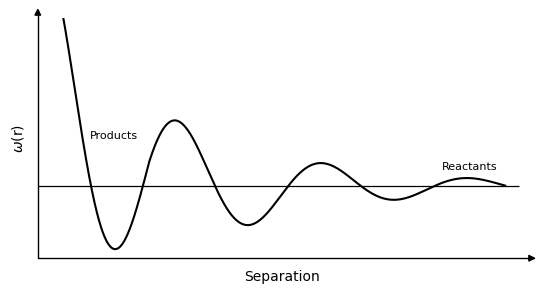

In [10]:
fig = plt.figure(figsize = (5.5,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

ax.plot(x1+0.194-0.6, y1+0.5, color = 'k')
ax.plot(x2-0.6, y2+0.3, color = 'k')
ax.hlines(0.3, 0, 6.9, color = 'k', lw = 0.9)

ax.text(0.75, 0.5, 'Products', fontsize = 8)
ax.text(5.8, 0.37, 'Reactants', fontsize = 8)

ax.set_xlim(0, 7)
ax.set_ylim(0, 1)

ax.set_xlabel('Separation')
ax.set_ylabel(r'$\omega$(r)')

fig.tight_layout()
plt.savefig('MeanForce.png', dpi = 150)
plt.show()